# Qredo transaction activity - Transaction counts

#### Maria Silva, June 2023

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import warnings
warnings.filterwarnings('ignore')

## Data import

In [2]:
file = os.path.realpath("../data/qredo_chain_transaction_types_2023-06-30T14_32_36.04524Z.csv")
daily_df = pd.read_csv(file)

daily_df["timestamp"] = pd.to_datetime(daily_df["timestamp"])
daily_df["day"] = pd.to_datetime(daily_df["timestamp"].dt.date)
daily_df=daily_df[daily_df["day"] > '2021-12-31']
daily_df = daily_df.groupby(["day", "tx_type"]).size().reset_index()
daily_df.columns = ["day", "tx_type", "tx_count"]
daily_df["year_month"] = daily_df["day"].dt.year.astype("str") + "-" + daily_df["day"].dt.month.astype("str")
daily_df["tx_type"] = np.where(daily_df["tx_type"]=="MPC Address", "MMI", daily_df["tx_type"])
daily_df["tx_type"] = np.where(daily_df["tx_type"]=="ql2", "QL2", daily_df["tx_type"])
daily_df["tx_group"] = np.where(daily_df["tx_type"].isin(["QL2", "MMI"]), daily_df["tx_type"], "Internal")
daily_df.head()

,day,tx_type,tx_count,year_month,tx_group
0,2022-01-01,Control,41,2022-1,Internal
1,2022-01-01,Iddoc,34,2022-1,Internal
2,2022-01-01,KVAssets,48,2022-1,Internal
3,2022-01-01,MMI,35,2022-1,MMI
4,2022-01-01,QL2,4850,2022-1,QL2


In [3]:
daily_df["day"].agg(["min", "max"])

min   2022-01-01
max   2023-05-19
Name: day, dtype: datetime64[ns]

In [4]:
temp_df = daily_df.groupby("tx_group")["tx_count"].sum()/daily_df["tx_count"].sum()
temp_df.sort_values(ascending=False)

tx_group
QL2         0.842454
Internal    0.098661
MMI         0.058885
Name: tx_count, dtype: float64

In [5]:
temp_df = daily_df.groupby("tx_type")["tx_count"].sum()/daily_df["tx_count"].sum()
temp_df.sort_values(ascending=False)

tx_type
QL2           0.842454
MMI           0.058885
KVAssets      0.042319
Control       0.019889
Iddoc         0.018471
underlying    0.017969
group         0.000013
Name: tx_count, dtype: float64

In [6]:
group = daily_df.groupby(["year_month", "tx_group", "tx_type"])
monthly_df = group[["tx_count"]].sum()
monthly_df["day"] = group["day"].first()
monthly_df = monthly_df.reset_index()

monthly_df.head()

,year_month,tx_group,tx_type,tx_count,day
0,2022-1,Internal,Control,2045,2022-01-01
1,2022-1,Internal,Iddoc,2705,2022-01-01
2,2022-1,Internal,KVAssets,1496,2022-01-01
3,2022-1,Internal,underlying,1986,2022-01-01
4,2022-1,MMI,MMI,2670,2022-01-01


## Transaction counts - Daily

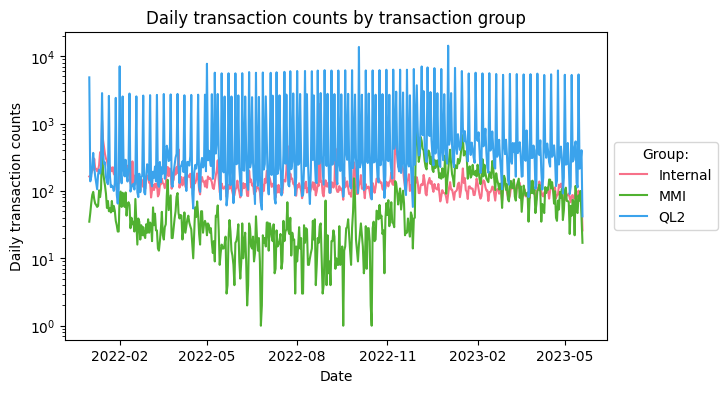

In [7]:
temp_df = daily_df.groupby(["day", "tx_group"])["tx_count"].sum().reset_index()

plt.figure(figsize=(7,4))
fig = sns.lineplot(data=temp_df, x="day", y="tx_count",hue="tx_group", palette="husl")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.ylabel("Daily transaction counts")
plt.xlabel("Date")
plt.yscale('log')
plt.title("Daily transaction counts by transaction group")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Group:")
plt.show()

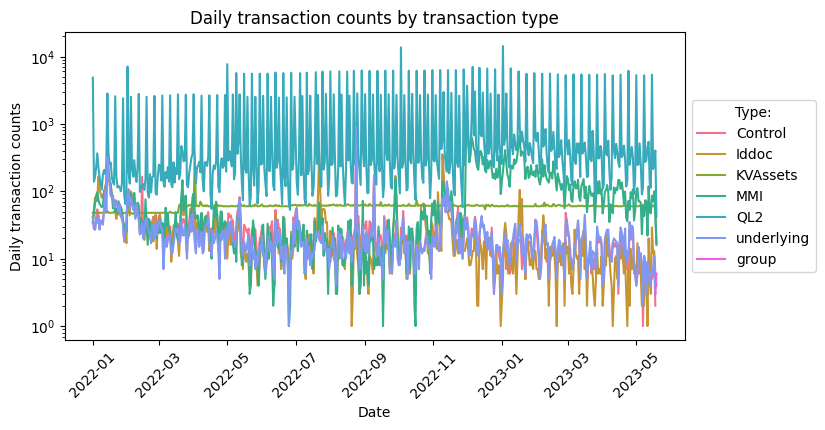

In [8]:
temp_df = daily_df.groupby(["day", "tx_type"])["tx_count"].sum().reset_index()

plt.figure(figsize=(8,4))
sns.lineplot(data=temp_df, x="day", y="tx_count",hue="tx_type", palette="husl")
plt.ylabel("Daily transaction counts")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.yscale('log')
plt.title("Daily transaction counts by transaction type")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Type:")
plt.show()

In [9]:
daily_df.groupby(["tx_group", "tx_type"])["tx_count"].agg(["mean", "std"])

mean          std
tx_group tx_type                             
Internal Control       28.111332    47.808461
         Iddoc         26.264000    38.248191
         KVAssets      59.694444    13.234462
         group          4.500000     2.121320
         underlying    25.397614    46.840844
MMI      MMI           83.063492   108.269048
QL2      QL2         1188.363095  2018.557868

In [10]:
temp_df = daily_df.groupby(["tx_group", "tx_type"])["tx_count"].quantile([0, 0.25, 0.5, 0.75, 1]).reset_index()
temp_df["quantile"] = temp_df["level_2"]
temp_df.pivot(index=['tx_group', 'tx_type'], columns='quantile', values='tx_count')

quantile             0.00    0.25   0.50    0.75     1.00
tx_group tx_type                                         
Internal Control      1.0   13.00   21.0   32.00    939.0
         Iddoc        1.0    9.00   15.0   28.00    417.0
         KVAssets    16.0   60.00   61.0   62.00    331.0
         group        3.0    3.75    4.5    5.25      6.0
         underlying   1.0   12.00   18.0   27.00    930.0
MMI      MMI          1.0   21.00   40.5  103.25   1023.0
QL2      QL2         42.0  166.00  274.0  575.25  14303.0

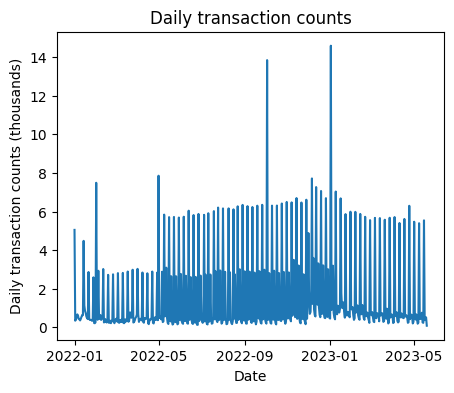

In [22]:
temp_df = daily_df.groupby("day")["tx_count"].sum().reset_index()
temp_df["tx_count"] = temp_df["tx_count"]/1000

plt.figure(figsize=(5,4))
fig = sns.lineplot(data=temp_df, x="day", y="tx_count")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
plt.ylabel("Daily transaction counts (thousands)")
plt.xlabel("Date")
plt.title("Daily transaction counts")
plt.show()

In [12]:
daily_df["tx_count"].agg(["mean", "std"])

mean    235.410927
std     929.656402
Name: tx_count, dtype: float64

In [13]:
daily_df["tx_count"].quantile([0, 0.25, 0.5, 0.75, 1])

0.00        1.0
0.25       17.0
0.50       37.0
0.75       70.0
1.00    14303.0
Name: tx_count, dtype: float64

## Transaction counts - Monthly

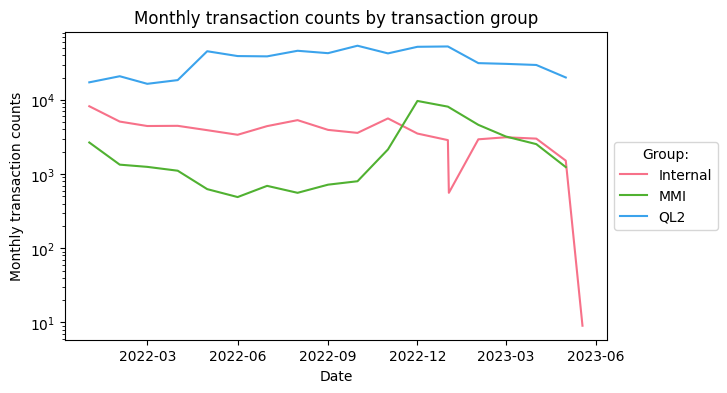

In [14]:
temp_df = monthly_df.groupby(["day", "tx_group"])["tx_count"].sum().reset_index()

plt.figure(figsize=(7,4))
fig = sns.lineplot(data=temp_df, x="day", y="tx_count",hue="tx_group", palette="husl")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.ylabel("Monthly transaction counts")
plt.xlabel("Date")
plt.yscale('log')
plt.title("Monthly transaction counts by transaction group")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Group:")
plt.show()

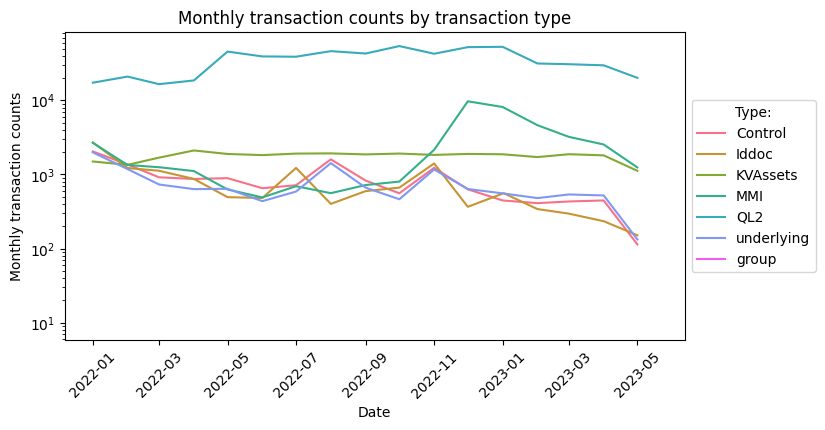

In [15]:
temp_df = monthly_df.groupby(["day", "tx_type"])["tx_count"].sum().reset_index()

plt.figure(figsize=(8,4))
sns.lineplot(data=temp_df, x="day", y="tx_count",hue="tx_type", palette="husl")
plt.ylabel("Monthly transaction counts")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.yscale('log')
plt.title("Monthly transaction counts by transaction type")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Type:")
plt.show()

In [16]:
monthly_df.groupby(["tx_group", "tx_type"])["tx_count"].agg(["mean", "std"])

mean           std
tx_group tx_type                               
Internal Control       831.764706    488.947151
         Iddoc         772.470588    628.399367
         KVAssets     1769.764706    241.381060
         group           9.000000           NaN
         underlying    751.470588    445.924758
MMI      MMI          2462.588235   2689.791583
QL2      QL2         35231.470588  13124.411768

In [17]:
temp_df = monthly_df.groupby(["tx_group", "tx_type"])["tx_count"].quantile([0, 0.25, 0.5, 0.75, 1]).reset_index()
temp_df["quantile"] = temp_df["level_2"]
temp_df.pivot(index=["tx_group", "tx_type"], columns='quantile', values='tx_count')

quantile                0.00     0.25     0.50     0.75     1.00
tx_group tx_type                                                
Internal Control       114.0    446.0    715.0    915.0   2045.0
         Iddoc         151.0    366.0    559.0   1121.0   2705.0
         KVAssets     1120.0   1716.0   1864.0   1892.0   2107.0
         group           9.0      9.0      9.0      9.0      9.0
         underlying    133.0    521.0    634.0    732.0   1986.0
MMI      MMI           490.0    720.0   1252.0   2670.0   9704.0
QL2      QL2         16524.0  20914.0  38769.0  45468.0  53962.0

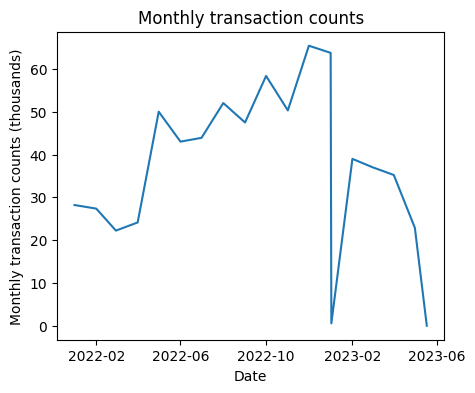

In [24]:
temp_df = monthly_df.groupby("day")["tx_count"].sum().reset_index()
temp_df["tx_count"] = temp_df["tx_count"]/1000

plt.figure(figsize=(5,4))
fig = sns.lineplot(data=temp_df, x="day", y="tx_count")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
plt.ylabel("Monthly transaction counts (thousands)")
plt.xlabel("Date")
plt.title("Monthly transaction counts")
plt.show()

In [19]:
monthly_df["tx_count"].agg(["mean", "std"])

mean     6902.339806
std     13744.185391
Name: tx_count, dtype: float64

In [20]:
monthly_df["tx_count"].quantile([0, 0.25, 0.5, 0.75, 1])

0.00        9.0
0.25      592.0
0.50     1225.0
0.75     2076.0
1.00    53962.0
Name: tx_count, dtype: float64